# task3 & task4
C(x=0) = 1

dC/dt(x=-1) = 0


compute C with implicit scheme and apply BCs

task 3: analyse stability + compare with task 1

task 4: analyse accuracy + compare with task 2

In [5]:
# import sympy
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#settings of time and space
xmax = 20
tmax = 150
dx = 1/xmax
dt = 0.01
D = 10**(-6)
D = 0.01 #################################################
dirichlet = 1 #at x=0
neuman = 0 #at x=-1

#initialization
space = np.linspace(1,xmax,xmax)
time = np.linspace(1,tmax,tmax)
S = dt/(dx*dx)
C = numpy.zeros([tmax,xmax]) #concentration values
A = numpy.zeros([xmax,xmax]) #discretisation matrix
C_0 = numpy.zeros([xmax]) #concentration vector at given time step

#fill matrix
def fill_matrix(matrix, dimension):
    for i in range(dimension):
        matrix[i,i] = 1+2*S*D
    for i in range(dimension-1):
        matrix[i+1,i] = -S*D
    for i in range(dimension-1):
        matrix[i,i+1] = -S*D

#apply BC to concentration vector
def apply_BC(C_vector):
    C_vector[0] = C_vector[0] + dirichlet 
    C_vector[-1] = C_vector[-1] + S*D*(2*dx*neuman + C_0[-2])

# comment on the next part:
the matrix is not solved by thomas algorithm, but using np.solve

In [7]:
#solve
fill_matrix(A,xmax)
apply_BC(C_0)
C_old = C_0

for i in range(tmax):
    C_new = np.linalg.solve(A,C_old) #compute next C vector
    C[i] = C_new #store in C matrix
    apply_BC(C_new)
    C_old = C_new #set old C vector to new for next iteration

# print(C)

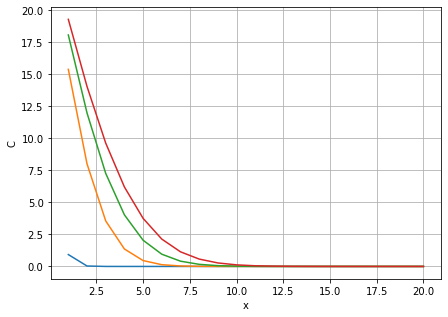

In [9]:
plottimesteps = [0,1,2,3,4,5]
plottimesteps = [0,10,20,30]
plottimesteps = [0,50,100,149]

fig = plt.figure(figsize = (7,5))

#for i in range(tmax):
for i in plottimesteps:
    plt.plot(space,C[i,:],label="C")
    #plt.plot(space,C[i,:],label="C at t="+str(i))

# plt.legend()
plt.xlabel("x")
plt.ylabel("C")
plt.grid()
plt.show()
#plt.savefig('plots/asdfasdfasdfasdf.pdf')

In [8]:
# LU decomposition
# not yet in use
import numpy
def LUsolve(A, b):
    n = A.shape[0]
    L = numpy.zeros((n,n))
    U = A.copy()
    bcopy = b.copy()
    x = numpy.zeros((n,1))

    #LU zerlegung
    for k in range(0, n-1):  
        #diagonalelemente manuell
        L[k,k] = 1
        L[n-1,n-1] = 1

        for i in range(k+1, n):
            L[i,k] = U[i,k] / U[k,k]
            bcopy[i] -= L[i,k]*bcopy[k]

            for j in range(k, n):
                U[i,j] -= L[i,k]*U[k,j]

    #k beschreibt das rückwärtseinsetzen
    for k in range(n-1, -1, -1):
        summe = 0
        for j in range(k+1, n):
            summe += U[k,j]*x[j]

        x[k] = (1/U[k,k])*(bcopy[k]-summe)
    
    return(x, L, U)


############
A = numpy.array([[2.0,-1.0,-3.0],
                [4.0,0.0,-3.0],
                [6.0,1.0,-1.0]])

b = numpy.array([[1.0],[-8.0],[-16.0]])

print(numpy.linalg.solve(A,b))
print(LUsolve(A,b)[0])

[[-1.625]
 [-5.75 ]
 [ 0.5  ]]
[[-1.625]
 [-5.75 ]
 [ 0.5  ]]
